In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

import joblib

### Reading data

In [2]:
peru = pd.read_excel('../dataset/dataset.xlsx')
peru

,Fecha entrega del Informe,Tipo de vía,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Categoría del bien,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Área Terreno,Área Construcción,Valor comercial (USD)
0,2020-02-16,1.0,NaN,Piura,Piura,Veintiseis de Octubre,NaN,NaN,-5.163182,-80.682388,Vivienda Unifamiliar,NaN,NaN,0.0,NaN,En construcción,Costos o reposición (directo),62.50,27.58,25278
1,2019-05-21,1.0,NaN,Lima,Lima,Surquillo,1.0,0.0,-12.115286,-77.003768,Departamento,NaN,NaN,1.0,NaN,Bueno,Comparación de mercado (directo),9.32,57.47,110807
2,2020-04-11,1.0,NaN,Junín,Satipo,Satipo,0.0,0.0,-11.235446,-74.629221,Vivienda Unifamiliar,NaN,NaN,7.0,NaN,Regular,Costos o reposición (directo),126.00,84.00,42285
3,2016-05-24,1.0,NaN,Lima,Lima,Santiago de Surco,0.0,0.0,-12.126384,-76.975707,Oficina,NaN,NaN,0.0,NaN,NaN,Comparación de mercado (directo),8.60,82.34,165503
4,2016-01-12,3.0,NaN,Lima,Lima,Lima,0.0,0.0,-12.089613,-76.994475,Vivienda Unifamiliar,NaN,NaN,43.0,NaN,NaN,Comparación de mercado (directo),357.55,423.22,711009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,2019-07-18,1.0,NaN,Lima,Lima,Santiago de Surco,0.0,0.0,-12.079598,-76.976514,Vivienda Unifamiliar,NaN,NaN,34.0,NaN,Bueno,Costos o reposición (directo),306.00,282.80,604241
53250,2017-10-22,3.0,NaN,Lima,Lima,Magdalena del Mar,1.0,0.0,-12.088102,-77.064252,Departamento,NaN,NaN,4.0,NaN,Bueno,Comparación de mercado (directo),4.98,86.56,132721
53251,2021-05-31,3.0,NaN,Lima,Lima,Lince,0.0,0.0,-12.087071,-77.035483,Departamento,NaN,NaN,64.0,NaN,Bueno,Comparación de mercado (directo),18.63,65.77,98655
53252,2018-07-11,3.0,NaN,Lima,Lima,Rímac,1.0,0.0,-12.030869,-77.025853,Departamento,NaN,NaN,4.0,NaN,Bueno,Comparación de mercado (directo),10.08,70.15,79553


In [3]:
peru.columns

Index(['Fecha entrega del Informe', 'Tipo de vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número de estacionamiento', 'Depósitos',
       'Latitud (Decimal)', 'Longitud (Decimal)', 'Categoría del bien',
       'Posición', 'Número de frentes', 'Edad', 'Elevador',
       'Estado de conservación', 'Método Representado', 'Área Terreno',
       'Área Construcción', 'Valor comercial (USD)'],
      dtype='object')

In [4]:
peru.shape

(53254, 20)

In [5]:
peru.describe().T

,count,mean,std,min,25%,50%,75%,max
Tipo de vía,48243.0,1.959745,1.066075e+00,1.000000,1.000000,2.000000,3.000000,10.00
Número de estacionamiento,45330.0,0.437304,3.357846e+00,0.000000,0.000000,0.000000,1.000000,329.00
Depósitos,45261.0,0.253463,9.652704e+00,0.000000,0.000000,0.000000,0.000000,2000.00
Latitud (Decimal),52391.0,-4.672508,1.527775e+03,-77.064902,-12.118135,-12.079393,-11.933839,349681.77
Longitud (Decimal),52337.0,-95.879283,4.370817e+03,-1000000.000000,-77.064979,-77.018683,-76.940540,1.00
Número de frentes,97.0,1.216495,2.199559e+00,0.000000,1.000000,1.000000,1.000000,22.00
Edad,48465.0,15.891922,3.405859e+01,0.000000,2.000000,8.000000,22.000000,2018.00
Elevador,116.0,1.181034,8.402809e-01,0.000000,0.000000,1.000000,2.000000,2.00
Valor comercial (USD),53254.0,393842.189150,1.081877e+06,21.000000,100822.000000,174391.000000,336808.250000,75012015.00


In [6]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53254 entries, 0 to 53253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha entrega del Informe  53254 non-null  datetime64[ns]
 1   Tipo de vía                48243 non-null  float64       
 2   Piso                       21 non-null     object        
 3   Departamento               53254 non-null  object        
 4   Provincia                  53254 non-null  object        
 5   Distrito                   53254 non-null  object        
 6   Número de estacionamiento  45330 non-null  float64       
 7   Depósitos                  45261 non-null  float64       
 8   Latitud (Decimal)          52391 non-null  float64       
 9   Longitud (Decimal)         52337 non-null  float64       
 10  Categoría del bien         50805 non-null  object        
 11  Posición                   113 non-null    object        
 12  Núme

### Changing DTYPES to columns according to the DICTIONARY OF FIELDS

In [7]:
peru['Área Terreno'].unique()

array(['62.50', '9.32', '126.00', ..., '474.35', '93.11', '6,212.08'],
      dtype=object)

In [8]:
peru['Número de estacionamiento'] = peru['Número de estacionamiento'].astype('float64')

In [9]:
peru['Latitud (Decimal)'] = peru['Latitud (Decimal)'].replace(',','', regex=True)

In [10]:
peru['Latitud (Decimal)'] = peru['Latitud (Decimal)'].astype('float64')

In [11]:
peru['Longitud (Decimal)'] = peru['Longitud (Decimal)'].replace(',','', regex=True)

In [12]:
peru['Longitud (Decimal)'] = peru['Longitud (Decimal)'].astype('float64')

In [13]:
peru['Área Terreno'] = peru['Área Terreno'].replace(',','', regex=True)

In [14]:
peru['Área Terreno'] = peru['Área Terreno'].astype('float64')

In [15]:
peru['Área Construcción'] = peru['Área Construcción'].replace(',','', regex=True)

In [16]:
peru['Área Construcción'] = peru['Área Construcción'].astype('float64')

In [17]:
peru.columns

Index(['Fecha entrega del Informe', 'Tipo de vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número de estacionamiento', 'Depósitos',
       'Latitud (Decimal)', 'Longitud (Decimal)', 'Categoría del bien',
       'Posición', 'Número de frentes', 'Edad', 'Elevador',
       'Estado de conservación', 'Método Representado', 'Área Terreno',
       'Área Construcción', 'Valor comercial (USD)'],
      dtype='object')

In [18]:
peru['Valor comercial (USD)'] = peru['Valor comercial (USD)'].replace(',','', regex=True)

In [19]:
peru['Valor comercial (USD)'] = peru['Valor comercial (USD)'].astype('float64')

In [20]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53254 entries, 0 to 53253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha entrega del Informe  53254 non-null  datetime64[ns]
 1   Tipo de vía                48243 non-null  float64       
 2   Piso                       21 non-null     object        
 3   Departamento               53254 non-null  object        
 4   Provincia                  53254 non-null  object        
 5   Distrito                   53254 non-null  object        
 6   Número de estacionamiento  45330 non-null  float64       
 7   Depósitos                  45261 non-null  float64       
 8   Latitud (Decimal)          52391 non-null  float64       
 9   Longitud (Decimal)         52337 non-null  float64       
 10  Categoría del bien         50805 non-null  object        
 11  Posición                   113 non-null    object        
 12  Núme

In [21]:
# peru = peru.drop(peru.iloc[:,[19]], axis=1)
# peru

In [22]:
unique_values = peru.apply(lambda col: col.unique())
unique_values


Fecha entrega del Informe    [2020-02-16T00:00:00.000000000, 2019-05-21T00:...
Tipo de vía                  [1.0, 3.0, 4.0, 2.0, 5.0, nan, 7.0, 9.0, 8.0, ...
Piso                         [nan, DECIMO PRIMER PISO, SEGUNDO PISO, 3, 1, ...
Departamento                 [Piura, Lima, Junín, Áncash, Ucayali, Arequipa...
Provincia                    [Piura, Lima, Satipo, Huaraz, Coronel Portillo...
Distrito                     [Veintiseis de Octubre, Surquillo, Satipo, San...
Número de estacionamiento    [nan, 1.0, 0.0, 2.0, 3.0, 21.0, 5.0, 6.0, 10.0...
Depósitos                    [nan, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 4.0, 108.0...
Latitud (Decimal)            [-5.163182, -12.115286, -11.235446, -12.126384...
Longitud (Decimal)           [-80.682388, -77.003768, -74.629221, -76.97570...
Categoría del bien           [Vivienda Unifamiliar, Departamento, Oficina, ...
Posición                                             [nan, Exterior, Interior]
Número de frentes                              [nan,

In [23]:
for value in unique_values:
    print(value)

['2020-02-16T00:00:00.000000000' '2019-05-21T00:00:00.000000000'
 '2020-04-11T00:00:00.000000000' ... '2020-10-09T00:00:00.000000000'
 '2015-06-29T00:00:00.000000000' '2016-03-25T00:00:00.000000000']
[ 1.  3.  4.  2.  5. nan  7.  9.  8. 10.  6.]
[nan 'DECIMO PRIMER PISO' 'SEGUNDO PISO' '3' '1'
 'PISO 16 Y ESTACIONAMIENTO 74' '9-10-11' '1 Y 2' '2'
 'Segundo y Tercer piso' '4' 'PISO 1' '6to piso' '1ER PISO'
 'estacionamiento 22' '2DO PISO' '7']
['Piura' 'Lima' 'Junín' 'Áncash' 'Ucayali' 'Arequipa' 'San Martín'
 'Callao' 'Tumbes' 'Loreto' 'Huancavelica' 'La Libertad' 'Puno'
 'Lambayeque' 'Pasco' 'Tacna' 'Huánuco' 'Cusco' 'Cajamarca' 'Apurímac'
 'Moquegua' 'Amazonas' 'Ayacucho' 'Madre de Dios']
['Piura' 'Lima' 'Satipo' 'Huaraz' 'Coronel Portillo' 'Arequipa'
 'Moyobamba' 'Prov. Const. del Callao' 'Zarumilla' 'Maynas' 'San Martín'
 'CHINCHA' 'Trujillo' 'Alto Amazonas' 'Bellavista' 'San Román' 'Santa'
 'Concepción' 'Chiclayo' 'Barranca' 'Chanchamayo' 'Oxapampa' 'Morropón'
 'Huancayo' 'Rioja' 

In [24]:
peru.loc[:, peru.dtypes==object]

,Piso,Departamento,Provincia,Distrito,Categoría del bien,Posición,Estado de conservación,Método Representado
0,NaN,Piura,Piura,Veintiseis de Octubre,Vivienda Unifamiliar,NaN,En construcción,Costos o reposición (directo)
1,NaN,Lima,Lima,Surquillo,Departamento,NaN,Bueno,Comparación de mercado (directo)
2,NaN,Junín,Satipo,Satipo,Vivienda Unifamiliar,NaN,Regular,Costos o reposición (directo)
3,NaN,Lima,Lima,Santiago de Surco,Oficina,NaN,NaN,Comparación de mercado (directo)
4,NaN,Lima,Lima,Lima,Vivienda Unifamiliar,NaN,NaN,Comparación de mercado (directo)
...,...,...,...,...,...,...,...,...
53249,NaN,Lima,Lima,Santiago de Surco,Vivienda Unifamiliar,NaN,Bueno,Costos o reposición (directo)
53250,NaN,Lima,Lima,Magdalena del Mar,Departamento,NaN,Bueno,Comparación de mercado (directo)
53251,NaN,Lima,Lima,Lince,Departamento,NaN,Bueno,Comparación de mercado (directo)
53252,NaN,Lima,Lima,Rímac,Departamento,NaN,Bueno,Comparación de mercado (directo)


In [25]:
peru = peru.apply(lambda x: x.str.lower() if x.dtype == "object" else x)  
peru

,Fecha entrega del Informe,Tipo de vía,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Categoría del bien,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Área Terreno,Área Construcción,Valor comercial (USD)
0,2020-02-16,1.0,NaN,piura,piura,veintiseis de octubre,NaN,NaN,-5.163182,-80.682388,vivienda unifamiliar,NaN,NaN,0.0,NaN,en construcción,costos o reposición (directo),62.50,27.58,25278.0
1,2019-05-21,1.0,NaN,lima,lima,surquillo,1.0,0.0,-12.115286,-77.003768,departamento,NaN,NaN,1.0,NaN,bueno,comparación de mercado (directo),9.32,57.47,110807.0
2,2020-04-11,1.0,NaN,junín,satipo,satipo,0.0,0.0,-11.235446,-74.629221,vivienda unifamiliar,NaN,NaN,7.0,NaN,regular,costos o reposición (directo),126.00,84.00,42285.0
3,2016-05-24,1.0,NaN,lima,lima,santiago de surco,0.0,0.0,-12.126384,-76.975707,oficina,NaN,NaN,0.0,NaN,NaN,comparación de mercado (directo),8.60,82.34,165503.0
4,2016-01-12,3.0,NaN,lima,lima,lima,0.0,0.0,-12.089613,-76.994475,vivienda unifamiliar,NaN,NaN,43.0,NaN,NaN,comparación de mercado (directo),357.55,423.22,711009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,2019-07-18,1.0,NaN,lima,lima,santiago de surco,0.0,0.0,-12.079598,-76.976514,vivienda unifamiliar,NaN,NaN,34.0,NaN,bueno,costos o reposición (directo),306.00,282.80,604241.0
53250,2017-10-22,3.0,NaN,lima,lima,magdalena del mar,1.0,0.0,-12.088102,-77.064252,departamento,NaN,NaN,4.0,NaN,bueno,comparación de mercado (directo),4.98,86.56,132721.0
53251,2021-05-31,3.0,NaN,lima,lima,lince,0.0,0.0,-12.087071,-77.035483,departamento,NaN,NaN,64.0,NaN,bueno,comparación de mercado (directo),18.63,65.77,98655.0
53252,2018-07-11,3.0,NaN,lima,lima,rímac,1.0,0.0,-12.030869,-77.025853,departamento,NaN,NaN,4.0,NaN,bueno,comparación de mercado (directo),10.08,70.15,79553.0


In [26]:
unique_values = peru.apply(lambda col: col.unique())
unique_values

Fecha entrega del Informe    [2020-02-16T00:00:00.000000000, 2019-05-21T00:...
Tipo de vía                  [1.0, 3.0, 4.0, 2.0, 5.0, nan, 7.0, 9.0, 8.0, ...
Piso                         [nan, decimo primer piso, segundo piso, 3, 1, ...
Departamento                 [piura, lima, junín, áncash, ucayali, arequipa...
Provincia                    [piura, lima, satipo, huaraz, coronel portillo...
Distrito                     [veintiseis de octubre, surquillo, satipo, san...
Número de estacionamiento    [nan, 1.0, 0.0, 2.0, 3.0, 21.0, 5.0, 6.0, 10.0...
Depósitos                    [nan, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 4.0, 108.0...
Latitud (Decimal)            [-5.163182, -12.115286, -11.235446, -12.126384...
Longitud (Decimal)           [-80.682388, -77.003768, -74.629221, -76.97570...
Categoría del bien           [vivienda unifamiliar, departamento, oficina, ...
Posición                                             [nan, exterior, interior]
Número de frentes                              [nan,

In [27]:
for value in unique_values:
    print(value)

['2020-02-16T00:00:00.000000000' '2019-05-21T00:00:00.000000000'
 '2020-04-11T00:00:00.000000000' ... '2020-10-09T00:00:00.000000000'
 '2015-06-29T00:00:00.000000000' '2016-03-25T00:00:00.000000000']
[ 1.  3.  4.  2.  5. nan  7.  9.  8. 10.  6.]
[nan 'decimo primer piso' 'segundo piso' '3' '1'
 'piso 16 y estacionamiento 74' '9-10-11' '1 y 2' '2'
 'segundo y tercer piso' '4' 'piso 1' '6to piso' '1er piso'
 'estacionamiento 22' '2do piso' '7']
['piura' 'lima' 'junín' 'áncash' 'ucayali' 'arequipa' 'san martín'
 'callao' 'tumbes' 'loreto' 'huancavelica' 'la libertad' 'puno'
 'lambayeque' 'pasco' 'tacna' 'huánuco' 'cusco' 'cajamarca' 'apurímac'
 'moquegua' 'amazonas' 'ayacucho' 'madre de dios']
['piura' 'lima' 'satipo' 'huaraz' 'coronel portillo' 'arequipa'
 'moyobamba' 'prov. const. del callao' 'zarumilla' 'maynas' 'san martín'
 'chincha' 'trujillo' 'alto amazonas' 'bellavista' 'san román' 'santa'
 'concepción' 'chiclayo' 'barranca' 'chanchamayo' 'oxapampa' 'morropón'
 'huancayo' 'rioja' 

In [28]:
lon = peru['Longitud (Decimal)']
lon

0       -80.682388
1       -77.003768
2       -74.629221
3       -76.975707
4       -76.994475
           ...    
53249   -76.976514
53250   -77.064252
53251   -77.035483
53252   -77.025853
53253   -78.999926
Name: Longitud (Decimal), Length: 53254, dtype: float64

In [29]:
lat = peru['Latitud (Decimal)']
lat

0        -5.163182
1       -12.115286
2       -11.235446
3       -12.126384
4       -12.089613
           ...    
53249   -12.079598
53250   -12.088102
53251   -12.087071
53252   -12.030869
53253    -8.088020
Name: Latitud (Decimal), Length: 53254, dtype: float64

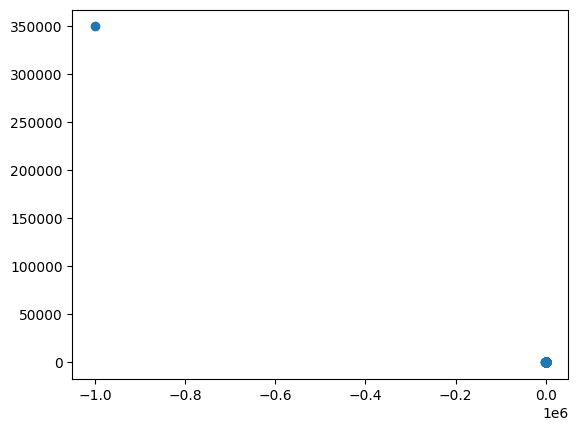

In [30]:
plt.scatter(x=lon, y=lat)

In [31]:
peru.columns

Index(['Fecha entrega del Informe', 'Tipo de vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número de estacionamiento', 'Depósitos',
       'Latitud (Decimal)', 'Longitud (Decimal)', 'Categoría del bien',
       'Posición', 'Número de frentes', 'Edad', 'Elevador',
       'Estado de conservación', 'Método Representado', 'Área Terreno',
       'Área Construcción', 'Valor comercial (USD)'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1df7ed0d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1df7ed12d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1df7ed0af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1df7ed1810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1df7ed1ab0>],
 'means': []}

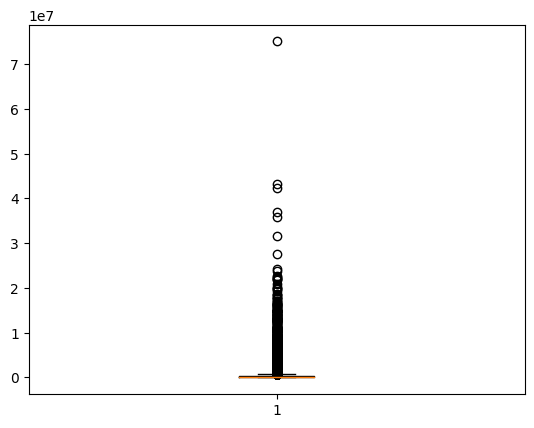

In [32]:
plt.boxplot(peru['Valor comercial (USD)'])

In [33]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%
Tipo de vía,5011,9.41
Piso,53233,99.96
Número de estacionamiento,7924,14.88
Depósitos,7993,15.01
Latitud (Decimal),863,1.62
Longitud (Decimal),917,1.72
Categoría del bien,2449,4.60
Posición,53141,99.79
Número de frentes,53157,99.82
Edad,4789,8.99


### Drop columns with the most NAN values and unnecessary columns

In [34]:
peru = peru.drop(["Piso", "Elevador", "Posición", "Número de frentes"], axis=1)


In [35]:
peru = peru.drop('Fecha entrega del Informe', axis=1)

In [36]:
peru

,Tipo de vía,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Categoría del bien,Edad,Estado de conservación,Método Representado,Área Terreno,Área Construcción,Valor comercial (USD)
0,1.0,piura,piura,veintiseis de octubre,NaN,NaN,-5.163182,-80.682388,vivienda unifamiliar,0.0,en construcción,costos o reposición (directo),62.50,27.58,25278.0
1,1.0,lima,lima,surquillo,1.0,0.0,-12.115286,-77.003768,departamento,1.0,bueno,comparación de mercado (directo),9.32,57.47,110807.0
2,1.0,junín,satipo,satipo,0.0,0.0,-11.235446,-74.629221,vivienda unifamiliar,7.0,regular,costos o reposición (directo),126.00,84.00,42285.0
3,1.0,lima,lima,santiago de surco,0.0,0.0,-12.126384,-76.975707,oficina,0.0,NaN,comparación de mercado (directo),8.60,82.34,165503.0
4,3.0,lima,lima,lima,0.0,0.0,-12.089613,-76.994475,vivienda unifamiliar,43.0,NaN,comparación de mercado (directo),357.55,423.22,711009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,lima,lima,santiago de surco,0.0,0.0,-12.079598,-76.976514,vivienda unifamiliar,34.0,bueno,costos o reposición (directo),306.00,282.80,604241.0
53250,3.0,lima,lima,magdalena del mar,1.0,0.0,-12.088102,-77.064252,departamento,4.0,bueno,comparación de mercado (directo),4.98,86.56,132721.0
53251,3.0,lima,lima,lince,0.0,0.0,-12.087071,-77.035483,departamento,64.0,bueno,comparación de mercado (directo),18.63,65.77,98655.0
53252,3.0,lima,lima,rímac,1.0,0.0,-12.030869,-77.025853,departamento,4.0,bueno,comparación de mercado (directo),10.08,70.15,79553.0


### Check all missing values

In [37]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%
Tipo de vía,5011,9.41
Número de estacionamiento,7924,14.88
Depósitos,7993,15.01
Latitud (Decimal),863,1.62
Longitud (Decimal),917,1.72
Categoría del bien,2449,4.60
Edad,4789,8.99
Estado de conservación,15700,29.48
Método Representado,7,0.01
Área Terreno,1153,2.17


### Fill NaN Values

Tipo de via -> moda
Número de estacionamiento -> moda
Depósitos -> moda
Latitud -> moda 
Longitud -> moda
Categoria del bien -> moda
Edad -> mean
Estado de conservacion -> moda
Metodo Representado -> moda
Area terreno -> moda
Area construccion -> moda


In [38]:
peru['Tipo de vía'].fillna(peru['Tipo de vía'].mode().iloc[0], inplace=True)

In [39]:
peru['Número de estacionamiento'].fillna(peru['Número de estacionamiento'].mode().iloc[0], inplace=True)

In [40]:
peru['Depósitos'].fillna(peru['Depósitos'].mode().iloc[0], inplace=True)

In [41]:
peru['Latitud (Decimal)'].fillna(peru['Latitud (Decimal)'].mode().iloc[0], inplace=True)

In [42]:
peru['Longitud (Decimal)'].fillna(peru['Longitud (Decimal)'].mode().iloc[0], inplace=True)

In [43]:
peru['Categoría del bien'].fillna(peru['Categoría del bien'].mode().iloc[0], inplace=True)

In [44]:
peru['Edad'].fillna(peru['Edad'].mode().iloc[0], inplace=True)

In [45]:
peru['Estado de conservación'].fillna(peru['Estado de conservación'].mode().iloc[0], inplace=True)

In [46]:
peru['Método Representado'].fillna(peru['Método Representado'].mode().iloc[0], inplace=True)

In [47]:
peru['Área Terreno'].fillna(peru['Área Terreno'].mode().iloc[0], inplace=True)

In [48]:
peru['Área Construcción'].fillna(peru['Área Construcción'].mode().iloc[0], inplace=True)

### Check all missing values again...

In [49]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%


### ok... no more missing values ! :D

### Visualizing the correlations between numerical variables

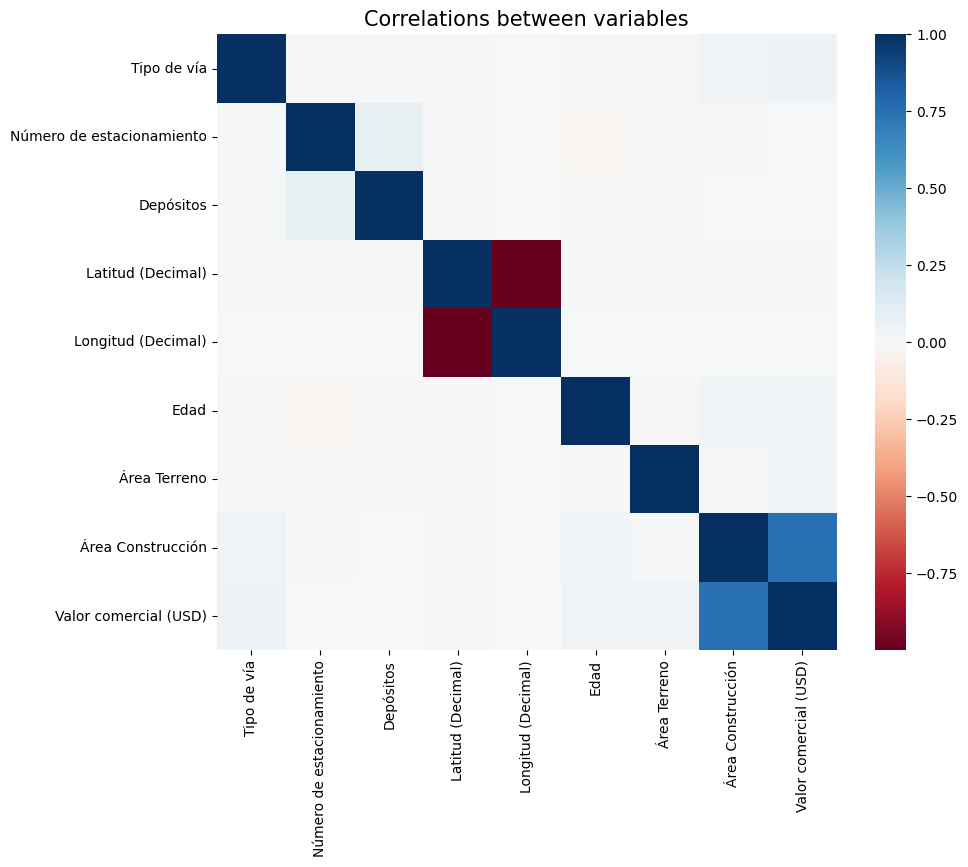

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(peru.corr(), cmap="RdBu")
plt.title("Correlations between variables", size=15)
plt.show()

In [51]:
peru

,Tipo de vía,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Categoría del bien,Edad,Estado de conservación,Método Representado,Área Terreno,Área Construcción,Valor comercial (USD)
0,1.0,piura,piura,veintiseis de octubre,0.0,0.0,-5.163182,-80.682388,vivienda unifamiliar,0.0,en construcción,costos o reposición (directo),62.50,27.58,25278.0
1,1.0,lima,lima,surquillo,1.0,0.0,-12.115286,-77.003768,departamento,1.0,bueno,comparación de mercado (directo),9.32,57.47,110807.0
2,1.0,junín,satipo,satipo,0.0,0.0,-11.235446,-74.629221,vivienda unifamiliar,7.0,regular,costos o reposición (directo),126.00,84.00,42285.0
3,1.0,lima,lima,santiago de surco,0.0,0.0,-12.126384,-76.975707,oficina,0.0,bueno,comparación de mercado (directo),8.60,82.34,165503.0
4,3.0,lima,lima,lima,0.0,0.0,-12.089613,-76.994475,vivienda unifamiliar,43.0,bueno,comparación de mercado (directo),357.55,423.22,711009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,lima,lima,santiago de surco,0.0,0.0,-12.079598,-76.976514,vivienda unifamiliar,34.0,bueno,costos o reposición (directo),306.00,282.80,604241.0
53250,3.0,lima,lima,magdalena del mar,1.0,0.0,-12.088102,-77.064252,departamento,4.0,bueno,comparación de mercado (directo),4.98,86.56,132721.0
53251,3.0,lima,lima,lince,0.0,0.0,-12.087071,-77.035483,departamento,64.0,bueno,comparación de mercado (directo),18.63,65.77,98655.0
53252,3.0,lima,lima,rímac,1.0,0.0,-12.030869,-77.025853,departamento,4.0,bueno,comparación de mercado (directo),10.08,70.15,79553.0


In [52]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53254 entries, 0 to 53253
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de vía                53254 non-null  float64
 1   Departamento               53254 non-null  object 
 2   Provincia                  53254 non-null  object 
 3   Distrito                   53254 non-null  object 
 4   Número de estacionamiento  53254 non-null  float64
 5   Depósitos                  53254 non-null  float64
 6   Latitud (Decimal)          53254 non-null  float64
 7   Longitud (Decimal)         53254 non-null  float64
 8   Categoría del bien         53254 non-null  object 
 9   Edad                       53254 non-null  float64
 10  Estado de conservación     53254 non-null  object 
 11  Método Representado        53254 non-null  object 
 12  Área Terreno               53254 non-null  float64
 13  Área Construcción          53254 non-null  flo

### One-Hot Encoding
Encoding the categorical features in X dataset by using One-Hot Encoding method

In [53]:
cat_cols = ["Departamento",
            "Provincia" ,
            "Distrito",
            "Categoría del bien",
            "Estado de conservación",
            "Método Representado"]
peru = pd.get_dummies(peru, columns=cat_cols)

In [54]:
peru

,Tipo de vía,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Edad,Área Terreno,Área Construcción,Valor comercial (USD),Departamento_amazonas,...,Estado de conservación_bueno - regular,Estado de conservación_en construcción,Estado de conservación_en proyecto,Estado de conservación_malo,Estado de conservación_muy bueno,Estado de conservación_regular,Estado de conservación_regular - malo,Método Representado_comparación de mercado (directo),Método Representado_costos o reposición (directo),Método Representado_renta o capitalización (indirecto)
0,1.0,0.0,0.0,-5.163182,-80.682388,0.0,62.50,27.58,25278.0,0,...,0,1,0,0,0,0,0,0,1,0
1,1.0,1.0,0.0,-12.115286,-77.003768,1.0,9.32,57.47,110807.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.0,-11.235446,-74.629221,7.0,126.00,84.00,42285.0,0,...,0,0,0,0,0,1,0,0,1,0
3,1.0,0.0,0.0,-12.126384,-76.975707,0.0,8.60,82.34,165503.0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.0,0.0,0.0,-12.089613,-76.994475,43.0,357.55,423.22,711009.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,0.0,0.0,-12.079598,-76.976514,34.0,306.00,282.80,604241.0,0,...,0,0,0,0,0,0,0,0,1,0
53250,3.0,1.0,0.0,-12.088102,-77.064252,4.0,4.98,86.56,132721.0,0,...,0,0,0,0,0,0,0,1,0,0
53251,3.0,0.0,0.0,-12.087071,-77.035483,64.0,18.63,65.77,98655.0,0,...,0,0,0,0,0,0,0,1,0,0
53252,3.0,1.0,0.0,-12.030869,-77.025853,4.0,10.08,70.15,79553.0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting data X, y

In [55]:
y = peru['Valor comercial (USD)']

In [56]:
X = peru.drop(['Valor comercial (USD)'], axis=1)

In [57]:
X

,Tipo de vía,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Edad,Área Terreno,Área Construcción,Departamento_amazonas,Departamento_apurímac,...,Estado de conservación_bueno - regular,Estado de conservación_en construcción,Estado de conservación_en proyecto,Estado de conservación_malo,Estado de conservación_muy bueno,Estado de conservación_regular,Estado de conservación_regular - malo,Método Representado_comparación de mercado (directo),Método Representado_costos o reposición (directo),Método Representado_renta o capitalización (indirecto)
0,1.0,0.0,0.0,-5.163182,-80.682388,0.0,62.50,27.58,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1.0,1.0,0.0,-12.115286,-77.003768,1.0,9.32,57.47,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.0,-11.235446,-74.629221,7.0,126.00,84.00,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1.0,0.0,0.0,-12.126384,-76.975707,0.0,8.60,82.34,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.0,0.0,0.0,-12.089613,-76.994475,43.0,357.55,423.22,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,0.0,0.0,-12.079598,-76.976514,34.0,306.00,282.80,0,0,...,0,0,0,0,0,0,0,0,1,0
53250,3.0,1.0,0.0,-12.088102,-77.064252,4.0,4.98,86.56,0,0,...,0,0,0,0,0,0,0,1,0,0
53251,3.0,0.0,0.0,-12.087071,-77.035483,64.0,18.63,65.77,0,0,...,0,0,0,0,0,0,0,1,0,0
53252,3.0,1.0,0.0,-12.030869,-77.025853,4.0,10.08,70.15,0,0,...,0,0,0,0,0,0,0,1,0,0


### Standardizing the Data
Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows

# $$ z=\frac{x-\mu}{\sigma} $$

In [58]:
important_num_cols = [
    "Tipo de vía",
    "Número de estacionamiento",
    "Depósitos",
    "Latitud (Decimal)",
    "Longitud (Decimal)",
    "Edad",
    "Área Terreno",
    "Área Construcción",
]

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [59]:
X

,Tipo de vía,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Edad,Área Terreno,Área Construcción,Departamento_amazonas,Departamento_apurímac,...,Estado de conservación_bueno - regular,Estado de conservación_en construcción,Estado de conservación_en proyecto,Estado de conservación_malo,Estado de conservación_muy bueno,Estado de conservación_regular,Estado de conservación_regular - malo,Método Representado_comparación de mercado (directo),Método Representado_costos o reposición (directo),Método Representado_renta o capitalización (indirecto)
0,-0.825951,-0.120004,-0.024207,-0.000246,0.003432,-0.440841,-0.021969,-0.256238,0,0,...,0,1,0,0,0,0,0,0,1,0
1,-0.825951,0.202384,-0.024207,-0.004834,0.004281,-0.410360,-0.022083,-0.227276,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.825951,-0.120004,-0.024207,-0.004253,0.004829,-0.227474,-0.021833,-0.201570,0,0,...,0,0,0,0,0,1,0,0,1,0
3,-0.825951,-0.120004,-0.024207,-0.004841,0.004288,-0.440841,-0.022085,-0.203178,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.074017,-0.120004,-0.024207,-0.004817,0.004284,0.869843,-0.021335,0.127117,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,-0.825951,-0.120004,-0.024207,-0.004811,0.004288,0.595513,-0.021446,-0.008943,0,0,...,0,0,0,0,0,0,0,0,1,0
53250,1.074017,0.202384,-0.024207,-0.004816,0.004267,-0.318917,-0.022093,-0.199089,0,0,...,0,0,0,0,0,0,0,1,0,0
53251,1.074017,-0.120004,-0.024207,-0.004815,0.004274,1.509944,-0.022063,-0.219234,0,0,...,0,0,0,0,0,0,0,1,0,0
53252,1.074017,0.202384,-0.024207,-0.004778,0.004276,-0.318917,-0.022082,-0.214990,0,0,...,0,0,0,0,0,0,0,1,0,0


### Train-Test-Validation Split
Splitting the data into Train and Test chunks for better evaluation

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [62]:
train = pd.concat([pd.Series(y_train, index=X_train.index,
                            name='price', dtype=int), X_train], axis=1)

In [63]:
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                            name='price', dtype=int), X_val], axis=1)

In [64]:
test = pd.concat([pd.Series(y_test, index=X_test.index,
                            name='price', dtype=int), X_test], axis=1)

In [65]:
train

,price,Tipo de vía,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Edad,Área Terreno,Área Construcción,Departamento_amazonas,...,Estado de conservación_bueno - regular,Estado de conservación_en construcción,Estado de conservación_en proyecto,Estado de conservación_malo,Estado de conservación_muy bueno,Estado de conservación_regular,Estado de conservación_regular - malo,Método Representado_comparación de mercado (directo),Método Representado_costos o reposición (directo),Método Representado_renta o capitalización (indirecto)
17136,69852,-0.825951,-0.120004,-0.024207,-0.002192,0.003810,-0.136031,-0.022036,-0.199632,0,...,0,0,0,0,0,1,0,1,0,0
51262,106676,0.124033,-0.120004,-0.024207,-0.004827,0.004282,0.077336,-0.021954,-0.180418,0,...,0,0,0,0,0,0,0,1,0,0
32199,199149,-0.825951,0.202384,0.088163,-0.004862,0.004277,-0.440841,-0.022077,-0.197869,0,...,0,1,0,0,0,0,0,1,0,0
38405,1093598,0.124033,-0.120004,-0.024207,-0.004798,0.004694,-0.410360,-0.020814,1.429368,0,...,0,0,0,0,1,0,0,0,1,0
28460,138903,1.074017,-0.120004,-0.024207,-0.004833,0.004275,0.747919,-0.022038,-0.204254,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11919,719680,-0.825951,-0.120004,-0.024207,-0.004804,0.004279,0.443108,-0.022029,-0.232576,0,...,0,0,0,0,0,0,0,1,0,0
32112,48443,1.074017,0.202384,-0.024207,-0.004667,0.004269,-0.349398,-0.022047,-0.218720,0,...,0,0,0,0,0,0,0,1,0,0
47384,26074,-0.825951,-0.120004,-0.024207,-0.000246,0.003432,-0.440841,-0.021960,-0.256238,0,...,0,1,0,0,0,0,0,0,1,0
11800,659368,1.074017,0.524773,0.200532,-0.004843,0.004281,-0.440841,-0.021911,-0.049202,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
test

,price,Tipo de vía,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Edad,Área Terreno,Área Construcción,Departamento_amazonas,...,Estado de conservación_bueno - regular,Estado de conservación_en construcción,Estado de conservación_en proyecto,Estado de conservación_malo,Estado de conservación_muy bueno,Estado de conservación_regular,Estado de conservación_regular - malo,Método Representado_comparación de mercado (directo),Método Representado_costos o reposición (directo),Método Representado_renta o capitalización (indirecto)
7481,189163,-0.825951,-0.120004,-0.024207,-0.004687,0.004273,0.686957,-0.021631,-0.107194,0,...,0,0,0,0,0,1,0,0,1,0
24270,83863,1.074017,0.202384,-0.024207,-0.004791,0.004264,-0.349398,-0.022071,-0.213885,0,...,0,0,0,0,0,0,0,1,0,0
16749,96350,2.024001,-0.120004,-0.024207,-0.004783,0.004274,1.997640,-0.021816,-0.161843,0,...,0,0,0,0,0,0,0,0,1,0
17782,93607,1.074017,-0.120004,-0.024207,-0.004795,0.004271,-0.410360,-0.022096,-0.232557,0,...,0,0,0,0,0,0,0,1,0,0
26869,50050,-0.825951,-0.120004,-0.024207,-0.004748,0.004323,-0.440841,-0.022041,-0.219980,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,409742,-0.825951,-0.120004,-0.024207,-0.004834,0.004284,-0.257955,-0.022030,-0.073581,0,...,0,0,0,0,0,1,0,1,0,0
43695,53160,-0.825951,-0.120004,-0.024207,-0.004682,0.004274,0.168779,-0.022022,-0.198421,0,...,0,0,0,0,0,0,0,1,0,0
3563,339589,-0.825951,-0.120004,-0.024207,-0.008760,0.005843,-0.410360,-0.016730,0.796536,0,...,0,0,0,0,0,0,0,0,1,0
38572,9255546,1.074017,-0.120004,-0.024207,-0.002199,0.003813,-0.318917,-0.019288,11.234721,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
validation

,price,Tipo de vía,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Edad,Área Terreno,Área Construcción,Departamento_amazonas,...,Estado de conservación_bueno - regular,Estado de conservación_en construcción,Estado de conservación_en proyecto,Estado de conservación_malo,Estado de conservación_muy bueno,Estado de conservación_regular,Estado de conservación_regular - malo,Método Representado_comparación de mercado (directo),Método Representado_costos o reposición (directo),Método Representado_renta o capitalización (indirecto)
6508,570398,1.074017,-0.120004,-0.024207,-0.002192,0.003816,0.839362,-0.021623,0.270571,0,...,0,0,0,0,0,0,0,0,1,0
39151,47947,0.124033,-0.120004,-0.024207,-0.001184,0.004438,-0.318917,-0.021584,-0.166223,0,...,0,0,0,0,0,0,0,0,1,0
21197,311118,-0.825951,-0.120004,-0.024207,-0.004791,0.004289,0.412627,-0.021759,0.183065,0,...,0,0,0,0,0,0,0,0,1,0
45193,31920,-0.825951,-0.120004,-0.024207,-0.004662,0.004254,-0.440841,-0.021845,-0.282962,0,...,0,0,0,0,0,1,0,0,1,0
41412,321133,1.074017,0.202384,-0.024207,-0.004817,0.004286,-0.410360,-0.022066,-0.144218,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18113,303472,-0.825951,0.847162,-0.024207,-0.007675,0.005545,0.168779,-0.021458,0.020126,0,...,0,0,0,0,0,0,0,1,0,0
32407,574352,1.074017,0.202384,-0.024207,-0.004816,0.004304,0.138298,-0.020448,0.068448,0,...,0,0,0,0,0,0,0,1,0,0
22751,123614,1.074017,0.202384,0.088163,-0.004863,0.004296,0.046855,-0.021830,0.008247,0,...,0,0,0,0,0,1,0,0,1,0
17634,1240230,-0.825951,-0.120004,-0.024207,-0.004726,0.004267,-0.075069,-0.019954,1.049655,0,...,0,0,0,0,0,1,0,0,1,0


### Defining several evaluation functions for convenience

In [68]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, predicitons):
    mae = mean_absolute_error(y, predicitons)
    mse = mean_squared_error(y, predicitons)
    rmse = np.sqrt(mean_squared_error(y, predicitons))
    r_squared = r2_score(y, predicitons)
    return mae, mse, rmse, r_squared

def save(model, type_model):
    filename = type_model + '.joblib'
    joblib.dump(model, filename)
    print("### model persisted ####" )

In [69]:
def plot_model_performance(y, predictions, model):
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    sns.regplot(x=predictions, y=y, ax=ax)
    ax.set_xlabel('Predicted price')
    ax.set_ylabel('Real price')
    ax.set_title('Behavior of {} model prediction'.format(model))
    plt.show()

In [70]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)


### Linear regression
The model is not penalized for its choice of weights, at all.

That means, during the training stage, if the model feels like one particular feature is particularly important, 
the model may place a large weight to the feature.

This sometimes leads to overfitting in small datasets.

In [71]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)
save(lin_reg, 'linear_regression')

MAE: 21147749515722.96
MSE: 4.953439732811904e+29
RMSE: 703806772687781.4
R2 Score: -5.117080091648898e+17
------------------------------
RMSE Cross-Validation: 282579020191529.0
### model persisted ####


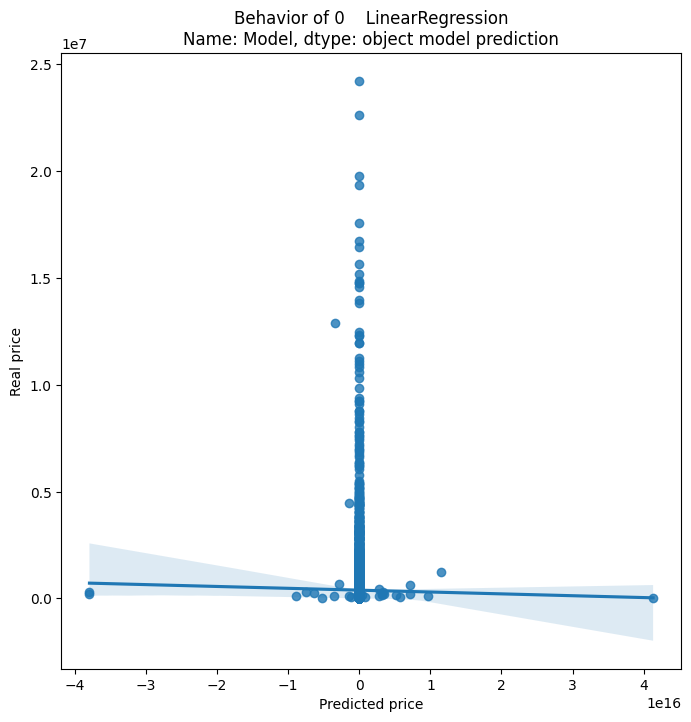

In [72]:
new_row = {"Model": ["LinearRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Ridge Regression

takes a step further and penalizes the model for the sum of squared value of the weights.

Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed.

In [73]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)
save(ridge, 'ridge_regression')

MAE: 227545.01960934742
MSE: 442644358203.1205
RMSE: 665315.2322043442
R2 Score: 0.5427325746918699
------------------------------
RMSE Cross-Validation: 796098.5354562306
### model persisted ####


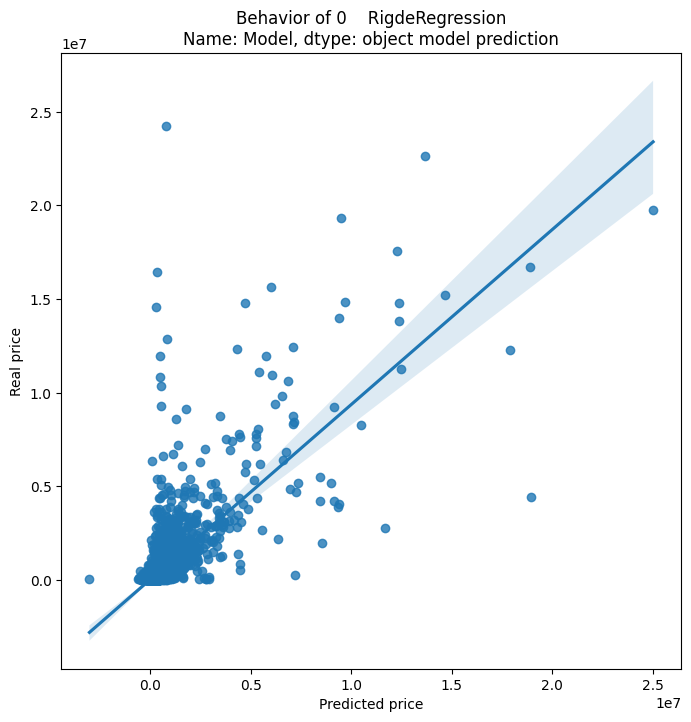

In [74]:
new_row = {"Model": ["RigdeRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Lasso Regression
is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights.

Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros.

In [75]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)
save(lasso, 'lasso_regression')


MAE: 228039.67823387595
MSE: 440732282795.3925
RMSE: 663876.7075258723
R2 Score: 0.5447078168529493
------------------------------
RMSE Cross-Validation: 2238620.2139102095
### model persisted ####


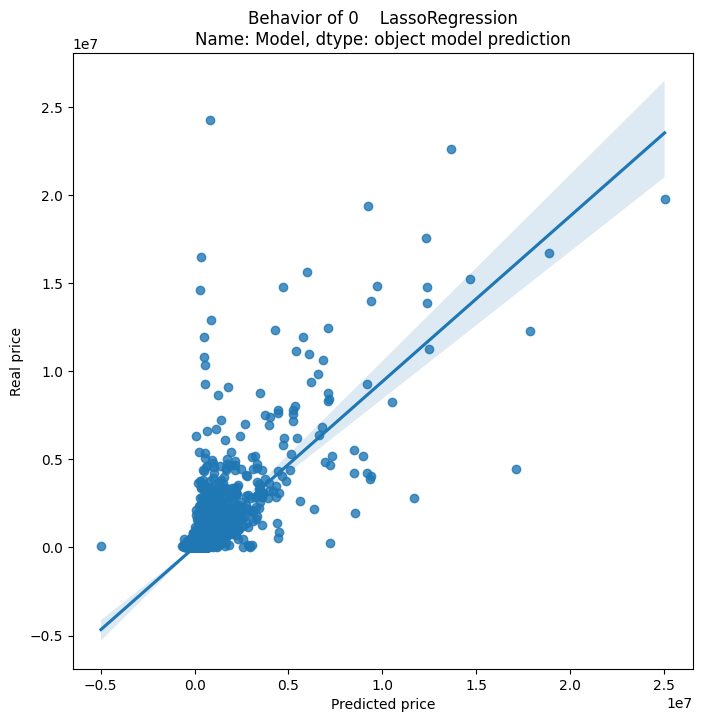

In [76]:
new_row = {"Model": ["LassoRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Elastic Net
is a hybrid of Lasso and Ridge, where both the absolute value penalization and squared penalization are included, being regulated with another coefficient l1_ratio:

In [77]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)
save(elastic_net, 'elastic_net')

MAE: 245975.00942937055
MSE: 495366913653.40454
RMSE: 703823.069850232
R2 Score: 0.488268292611596
------------------------------
RMSE Cross-Validation: 743555.2733760629
### model persisted ####


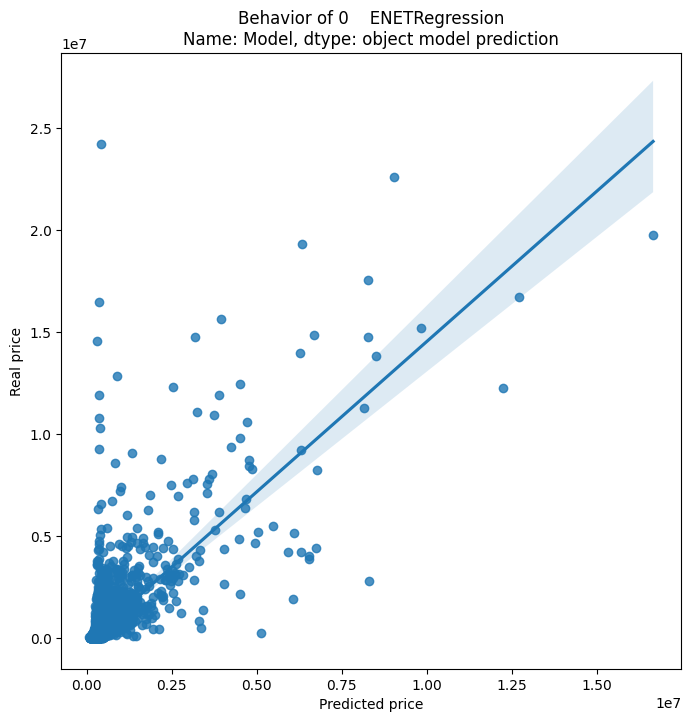

In [78]:
new_row = {"Model": ["ENETRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Random Forest Regressor

In [79]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)
save(random_forest, 'random_forest')


MAE: 110661.04360618675
MSE: 255555542132.34918
RMSE: 505525.01632693625
R2 Score: 0.7360020011359565
------------------------------
RMSE Cross-Validation: 512988.63384304306
### model persisted ####


In [80]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,


'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [81]:
rf = RandomForestRegressor()

In [82]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [ ]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_depth= 20, bootstrap=True) 
randmf.fit( X_train, y_train)
predictions = randmf.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)
save(random_forest, 'random_forest')


In [ ]:
plot_model_performance(y_test, predictions, new_row['Model'])

In [ ]:
new_row = {"Model": ["RandomForestRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### XGBoost Regressor

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)
save(xgb, 'xgb_regressor')

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor



pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)

In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
pipeline.get_params().keys()

In [ ]:
hyperparameter_grid = {
    'regressor__n_estimators': [100, 500, 1000, 2000],
    'regressor__max_depth': [3, 6, 9, 12],
    'regressor__learning_rate': [0.01, 0.03, 0.05, 0.1]
}


random_cv = sklearn.model_selection.RandomizedSearchCV(estimator=pipeline,
            param_distributions=hyperparameter_grid,
            cv=, 
            n_iter=100,
            scoring = 'neg_root_mean_squared_error',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)



random_cv.fit(X_train, y_train)

In [ ]:
best_pipe = random_cv.best_estimator_

In [ ]:
best_pipe

In [ ]:
best_pipe.score(X_test, y_test)

In [ ]:
new_row = {"Model": ["XGBRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Model Comparison
The less the Root Mean Squared Error (RMSE), The better the model is.

In [ ]:
models.sort_values(by="RMSE (Cross-Validation)")

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()